In [1]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader
import torch.optim as optim
from DataLoading import mnistLoader
%matplotlib inline

In [2]:
mytransform = transforms.Compose([transforms.ToTensor(),
                    transforms.Normalize((0.7,), (0.7,))
                    ])     
train_set = datasets.MNIST(root = './data', train = True, transform = mytransform, download = True)
test_set = datasets.MNIST(root = './data', train = False, transform = mytransform, download = True)


In [3]:


mnistLoader 

In [4]:
iterator = iter(train_loader)
batch = next(iterator)
x, y = batch
print(x.shape)
print(y.shape)



torch.Size([32, 1, 28, 28])
torch.Size([32])


(28, 28)


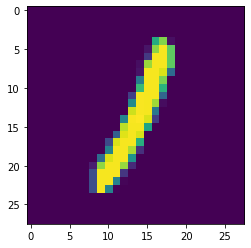

In [5]:
image = x[0].squeeze().numpy()
print(image.shape)
plt.imshow(image)

In [6]:

class mnistCNN(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.convLayer = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=3, dilation=1, padding=0),
            nn.ReLU(),
            nn.Conv2d(6, 12, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2)
        )
        self.linerLayer = nn.Sequential(
            nn.Linear(1728, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
            nn.Softmax(dim=1)
        )
    def forward(self, x):
        x = self.convLayer(x)
        x = x.view(-1, 1728)
        x = self.linerLayer(x)
        return x

        


In [7]:
model = mnistCNN()
z = model(x)
print(z.shape)
a = z.sum(dim=1)
print(a)
print(a.shape)

torch.Size([32, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000], grad_fn=<SumBackward1>)
torch.Size([32])


In [8]:
model = mnistCNN()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
max_epochs = 15
from Trainer import trainer

model_trainer = trainer(model, optimizer, loss_fn, train_loader, val_loader, test_loader, max_epochs)




In [9]:
model_trainer.fit()


1.7228986024856567  ,  1.7259483337402344
1.6457804441452026  ,  1.6522785425186157
1.6180187463760376  ,  1.6253918409347534
1.6088262796401978  ,  1.6161335706710815
1.6028200387954712  ,  1.609512448310852
1.6029936075210571  ,  1.6153829097747803
1.5906404256820679  ,  1.5998724699020386
1.5298477411270142  ,  1.5443891286849976
1.5080173015594482  ,  1.518897533416748
1.4947441816329956  ,  1.507659912109375
1.4900238513946533  ,  1.5039182901382446
1.488451600074768  ,  1.5042853355407715
1.4860315322875977  ,  1.5012155771255493
1.4817516803741455  ,  1.499706745147705
1.4824732542037964  ,  1.4970884323120117


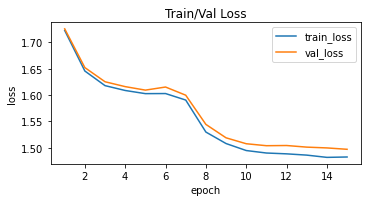

In [10]:
model_trainer.plot()

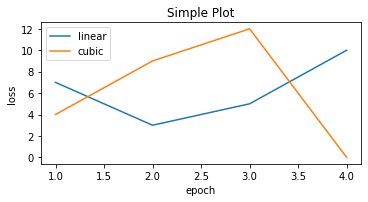

In [11]:


a = list(range(1,5))
b = np.array([7,3,5,10])
plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(a, b, label='linear')
c = np.array([4, 9 , 12, 0])
plt.plot(a, c, label='cubic')
plt.xlabel('epoch')
plt.ylabel("loss")
plt.title("Simple Plot")
plt.legend()